#  Install package

In [1]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
# ! pip install contextily
# ! pip install matplotlib_scalebar
# ! pip install langchain
# ! pip install langchain-openai
# ! pip install geojson
# ! pip install OSMPythonTools

# Import package

In [2]:
%load_ext autoreload
%autoreload 2
    
import os
from PIL import Image

import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
# from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output
import matplotlib.pyplot as plt

import base64

import pickle
import sys
import osmnx as ox

import LLM_Find_Constants as constants
import helper

# from LLM_Find_kernel import Solution

from langchain_openai import ChatOpenAI

from langchain_core.prompts import ChatPromptTemplate

In [3]:
OpenAI_key = helper.load_OpenAI_key()

## Input task and data desciption

In [4]:
# isReview = True
isReview = False

In [5]:
# # Case 1
# task_name ='OSM_PA_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_PA_boundary.gpkg'
# task = rf'''1. Download the administrative boundary of Pennsylvania State, USA from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_SC_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_SC_boundary.gpkg'
# task = rf'''1. Download the administrative boundary of South Carolina State, USA from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_PA_hospital'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_PA_hospital.gpkg'
# task = rf'''1. Download all hospitals in Pennsylvania State, USA, from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_SC_hospital'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_SC_hospital.gpkg'
# task = rf'''1. Download all hospitals in South Carolina State, USA, from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_SC_school'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_SC_school.gpkg'
# task = rf'''1. Download all schools in South Carolina State, USA, from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_CA_park'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_CA_parks.gpkg.'
# task = rf'''1. Download all parks in California, USA, from OpenStreetMap, including urban public, recreation, state, and national parks.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# # '''

# task_name ='OSM_USA_university'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_USA_universities.gpkg.'
# task = rf'''1. Download all universities and colleges in USA from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_state_college_street'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_state_college_street.gpkg.'
# task = rf'''1. Download all streets of State College, Pennsylvania, USA, from OpenStreetMap.
# 2. Save the downloaded data as polylines in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_tract'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_tract.gpkg.'
# if os.path.exists(saved_fname):
#     os.remove(saved_fname)
# task = rf'''1. Download all census tract boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_blockgroups'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_blockgroups.gpkg.'
# if os.path.exists(saved_fname):
#     os.remove(saved_fname)
# task = rf'''1. Download all Census block group boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_Nigeria_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_Nigeria_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Nigeria from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''


# task_name ='OSM_Afghanistan_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_Afghanistan_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Afghanistan from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# Case 1
# task_name ='Census_Centre_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_Centre_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Centre County of Pennsylvania State, USA from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_countries_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg'
# task = rf'''1. Download the administrative boundary of all Counties of South Carolina from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# # This is a difficult case, the above cases were okay during the test.
# task_name ='Wuhan_railway_network'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Wuhan_Railway_network.gpkg.'
# task = rf'''1. Download the railway network in Wuhan, Hubei, China.
# 2. Save the downloaded data as polylines in GeoPackage format, save it at: {saved_fname} 
# '''
#  Using "Hubei Province" may not return polygons.


# task_name ='OSM_Nigeria_railway'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_Nigeria_railway.gpkg.'
# task = rf'''1. Download the railway network of Nigeria from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_counties_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_population.csv'
# task = rf'''1. Download latest population for each county in South Carolina.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_Richland_race_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_Richland_race_population.csv'
# task = rf'''1. Download latest population by race for Richland county in South Carolina.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_PA_counties_race_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_PA_counties_race_population.csv'
# task = rf'''1. Download latest population by race for all counties in Pennsylvania.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''


# task_name ='Census_US_states_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_population.csv'
# task = rf'''1. Download latest population for all states in USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_states_senior_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_senior_population.csv'
# task = rf'''1. Download the latest senior population for all states in the USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''
 

# task_name ='Census_US_states_education_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_education_population.csv'
# task = rf'''1. Download latest population by higher education attainment over 25 for all states in USA, together with the entire population of each state.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_states_education_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_education_population.csv'
# task = rf'''1. Download latest population by higher education attainment over 25 for all states in USA, both male and female, together with the entire population of each state.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''


# task_name ='Census_US_county_household_income'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_county_household_income.csv'
# task = rf'''1. Download the latest median household income data for each county in the USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''


# task_name ='Census_US_county_population_by_race'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_county_population_by_race.csv'
# task = rf'''1. Download the latest population by race data for each county in the USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='COVID_Richland_SC'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\COVID_Richland_SC.csv'
# task = rf'''1. Download the COVID-19 case data of Richland County in South Carolina, USA. The time is from 2021-01 to 2021-09.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='COVID_PA'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\COVID_PA.csv'
# task = rf'''1. Download the COVID-19 case data of all counties in Pennsylvania, USA. The time is from 2021-10 to 2022-02.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Nigeria_cities'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Nigeria_cities.gpkg'
# task = rf'''1. Download the city locations of Nigeria; do not download towns.   
# 2. Save the downloaded data as points, save it at: {saved_fname} 
# '''


# task_name ='Nigeria_rivers'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Nigeria_rivers.gpkg'
# task = rf'''1. Download the rivers of Nigeria.   
# 2. Save the downloaded data as polylines, save it at: {saved_fname} 
# '''

# task_name ='Nigeria_state_boundary'  # most test failed!!!!!
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Nigeria_state_boundary.gpkg'
# task = rf'''1. Download all 36 states' boundaries of Nigeria.   
# 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# '''


# task_name ='OpenWeather_Columbia'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OpenWeather_Columbia.csv'
# task = rf'''1. Download the historical weather data of Columbia, South Carolina in May 2024.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

# task_name ='OpenWeather_Yulin_Guangxi'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OpenWeather_Yulin_Guangxi.csv'
# task = rf'''1. Download the historical weather data of Yulin, Guangxi, China, in May 2024.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''


# task_name ='States_colledge_popultion'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\States_colledge_popultion.csv'
# task = rf'''1. Download the population over 25 years old and the population with a college degree or higher at the state level of USA for 2012 and 2022.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

# task_name ='Brasília_image'   # not ready yet
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Brasília_image.tif'
# task = rf'''1. Download the Brasília satellite image at level 6.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

task_name ='Japan_image'
saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif'
task = rf'''1. Download the Japan satellite image at level 6.
2. Save the downloaded data in tiff format, save it at: {saved_fname} 
'''



if os.path.exists(saved_fname):
    os.remove(saved_fname)

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)
# 
# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
# model_name = "gpt-3.5-turbo"


model_name = r'gpt-4o'
# model_name = r'gpt-4'

model = ChatOpenAI(api_key=OpenAI_key, model=model_name, temperature=1)

In [6]:
%load_ext autoreload
%autoreload 2
import helper
    
source_select_prompt_str = helper.create_select_prompt(task=task)

print(source_select_prompt_str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data.
 
Your mission: select a suitable data source from the given list to download the requested geo-spatial data for this task: 1. Download the Japan satellite image at level 6.
2. Save the downloaded data in tiff format, save it at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif 


Requirements: 
1. Return the

In [7]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(source_select_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)

print("Select the data source: \n")
print(LLM_reply_str)

Select the data source: 

{'Explanation': "For downloading the Japan satellite image at level 6, the most suitable data source among the given ones is ESRI World Imagery (for Export).", "Selected data source": 'ESRI World Imagery (for Export)'}


In [8]:
import ast
select_source = ast.literal_eval(LLM_reply_str)

selected_data_source= select_source['Selected data source']
data_source_ID = constants.data_source_dict[selected_data_source]['ID']

print("selected_data_source:", selected_data_source)
print("data_source_ID:", data_source_ID)

handbook_list = constants.handbooks[f"{data_source_ID}"]
handbook_str =  '\n'.join([f"{idx + 1}. {line}" for idx, line in enumerate(handbook_list)])
print()
print(f"Handbook:\n{handbook_str}")

selected_data_source: ESRI World Imagery (for Export)
data_source_ID: ESRI_world_imagery

Handbook:
1. The endpoint is: https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{x}/{y}. 'x' is the row number from the top, 'y' is the column number from the left.
2. You need to download the image tiles into the given folder (name them as 'z-x-y.jpg'), and then mosaic them into a single TIFF image with jpeg compression.
3. Put your reply into a Python code block. Explanation or conversation can be Python comments at the begining of the code block(enclosed by ```python and ```).
4. The download code is only in a function named 'download_data()'. The last line is to execute this function; do not use `if __name__ == '__main__':`.
5. You can use OSMnx Python package to download the boundary of the request place, then use boundary's bounding box to determine the extent of the imagery. Example code: `gdf = ox.geocode_to_gdf(places)`.


In [9]:
%load_ext autoreload
%autoreload 2

download_prompt_str = helper.create_download_prompt(task, selected_data_source, handbook_str)

print(download_prompt_str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data. When downloading geo-spatial data, the handbook for a perticular data source is provided, you can follow it, and write Python code carefully to download the data. 
 
Your mission: download geo-spatial data from the given data source for this task: 1. Download the Japan satellite image at level 6.
2. Save the downloaded data in tiff format, save it at: E:\OneDrive_PSU\OneDri

In [10]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(download_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)
print(LLM_reply_str)

```python
import requests
import os
import osmnx as ox
from PIL import Image
import numpy as np

def download_data():
    # Define the download directory and the final output path
    download_dir = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\tiles"
    final_output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif"

    # Create the download directory if it doesn't exist
    os.makedirs(download_dir, exist_ok=True)

    # Use OSMnx to get the bounding box for Japan
    gdf = ox.geocode_to_gdf("Japan")
    bbox = gdf.total_bounds  # (minx, miny, maxx, maxy)
    
    # Convert the bounding box to tile numbers at zoom level 6
    def deg2num(lat_deg, lon_deg, zoom):
        lat_rad = np.radians(lat_deg)
        n = 2.0 ** zoom
        xtile = int((lon_deg + 180.0) / 360.0 * n)
        ytile = int((1.0 - np.log(np.tan(lat_rad) + (1 / np.cos(lat_rad))) / np.pi)

In [11]:
code = helper.extract_code_from_str(LLM_reply_str, task)
display(Code(code, language='python'))

import requests
import os
import osmnx as ox
from PIL import Image
import numpy as np

def download_data():
    # Define the download directory and the final output path
    download_dir = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\tiles"
    final_output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif"

    # Create the download directory if it doesn't exist
    os.makedirs(download_dir, exist_ok=True)

    # Use OSMnx to get the bounding box for Japan
    gdf = ox.geocode_to_gdf("Japan")
    bbox = gdf.total_bounds  # (minx, miny, maxx, maxy)
    
    # Convert the bounding box to tile numbers at zoom level 6
    def deg2num(lat_deg, lon_deg, zoom):
        lat_rad = np.radians(lat_deg)
        n = 2.0 ** zoom
        xtile = int((lon_deg + 180.0) / 360.0 * n)
        ytile = int((1.0 - np.log(np.tan(lat_rad) + (1 / np.cos(lat_rad))) / np.pi) / 2.0 * n

import requests
import os
import osmnx as ox
from PIL import Image
import numpy as np

def download_data():
    # Define the download directory and the final output path
    download_dir = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\tiles"
    final_output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif"

    # Create the download directory if it doesn't exist
    os.makedirs(download_dir, exist_ok=True)

    # Use OSMnx to get the bounding box for Japan
    gdf = ox.geocode_to_gdf("Japan")
    bbox = gdf.total_bounds  # (minx, miny, maxx, maxy)
    
    # Convert the bounding box to tile numbers at zoom level 6
    def deg2num(lat_deg, lon_deg, zoom):
        lat_rad = np.radians(lat_deg)
        n = 2.0 ** zoom
        xtile = int((lon_deg + 180.0) / 360.0 * n)
        ytile = int((1.0 - np.log(np.tan(lat_rad) + (1 / np.cos(lat_rad))) / np.pi) / 2.0 * n)
        return (xtile, ytile)

    min_lon, min_lat, max_lon, max_lat = bbox
    zoom_level = 6

    # Calculate the tile range for the bounding box
    x_min, y_min = deg2num(max_lat, min_lon, zoom_level)
    x_max, y_max = deg2num(min_lat, max_lon, zoom_level)

    tiles = []

    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            tile_url = f"https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{zoom_level}/{y}/{x}"
            tile_path = os.path.join(download_dir, f"{zoom_level}-{x}-{y}.jpg")
            
            # Download tile if not already downloaded
            if not os.path.exists(tile_path):
                response = requests.get(tile_url)
                with open(tile_path, 'wb') as file:
                    file.write(response.content)
            tiles.append((x, y, tile_path))
    
    # Read the first tile to get the size
    sample_tile = Image.open(tiles[0][2])
    tile_width, tile_height = sample_tile.size
    mosaic_width = (x_max - x_min + 1) * tile_width
    mosaic_height = (y_max - y_min + 1) * tile_height

    # Create a new image for the mosaic
    mosaic_image = Image.new('RGB', (mosaic_width, mosaic_height))
    
    for x, y, tile_path in tiles:
        tile = Image.open(tile_path)
        x_offset = (x - x_min) * tile_width
        y_offset = (y - y_min) * tile_height
        mosaic_image.paste(tile, (x_offset, y_offset))
    
    # Save the mosaic as a TIFF file with JPEG compression
    mosaic_image.save(final_output_path, format='TIFF', compression='jpeg')

download_data()

In [12]:

%autoreload 2
%load_ext autoreload
    
code = helper.execute_complete_program(code=code, try_cnt=10, task=task, model_name=model_name, handbook_str=handbook_str)
display(Code(code, language='python'))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


-------------- Running code (trial # 1/10) --------------




--------------- Done ---------------




import requests
import os
import osmnx as ox
from PIL import Image
import numpy as np

def download_data():
    # Define the download directory and the final output path
    download_dir = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\tiles"
    final_output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif"

    # Create the download directory if it doesn't exist
    os.makedirs(download_dir, exist_ok=True)

    # Use OSMnx to get the bounding box for Japan
    gdf = ox.geocode_to_gdf("Japan")
    bbox = gdf.total_bounds  # (minx, miny, maxx, maxy)
    
    # Convert the bounding box to tile numbers at zoom level 6
    def deg2num(lat_deg, lon_deg, zoom):
        lat_rad = np.radians(lat_deg)
        n = 2.0 ** zoom
        xtile = int((lon_deg + 180.0) / 360.0 * n)
        ytile = int((1.0 - np.log(np.tan(lat_rad) + (1 / np.cos(lat_rad))) / np.pi) / 2.0 * n)
        return (xtile, ytile)

    min_lon, min_lat, max_lon, max_lat = bbox
    zoom_level = 6

    # Calculate the tile range for the bounding box
    x_min, y_min = deg2num(max_lat, min_lon, zoom_level)
    x_max, y_max = deg2num(min_lat, max_lon, zoom_level)

    tiles = []

    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            tile_url = f"https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{zoom_level}/{y}/{x}"
            tile_path = os.path.join(download_dir, f"{zoom_level}-{x}-{y}.jpg")
            
            # Download tile if not already downloaded
            if not os.path.exists(tile_path):
                response = requests.get(tile_url)
                with open(tile_path, 'wb') as file:
                    file.write(response.content)
            tiles.append((x, y, tile_path))
    
    # Read the first tile to get the size
    sample_tile = Image.open(tiles[0][2])
    tile_width, tile_height = sample_tile.size
    mosaic_width = (x_max - x_min + 1) * tile_width
    mosaic_height = (y_max - y_min + 1) * tile_height

    # Create a new image for the mosaic
    mosaic_image = Image.new('RGB', (mosaic_width, mosaic_height))
    
    for x, y, tile_path in tiles:
        tile = Image.open(tile_path)
        x_offset = (x - x_min) * tile_width
        y_offset = (y - y_min) * tile_height
        mosaic_image.paste(tile, (x_offset, y_offset))
    
    # Save the mosaic as a TIFF file with JPEG compression
    mosaic_image.save(final_output_path, format='TIFF', compression='jpeg')

download_data()

In [13]:
# Note: the headers are usually wrong.0

# Show the downloaded data

In [14]:
saved_fname

'E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Find\\Downloaded_Data\\Japan_image.tif'

In [15]:
ext_name = saved_fname[-4:]
ext_name

'.tif'

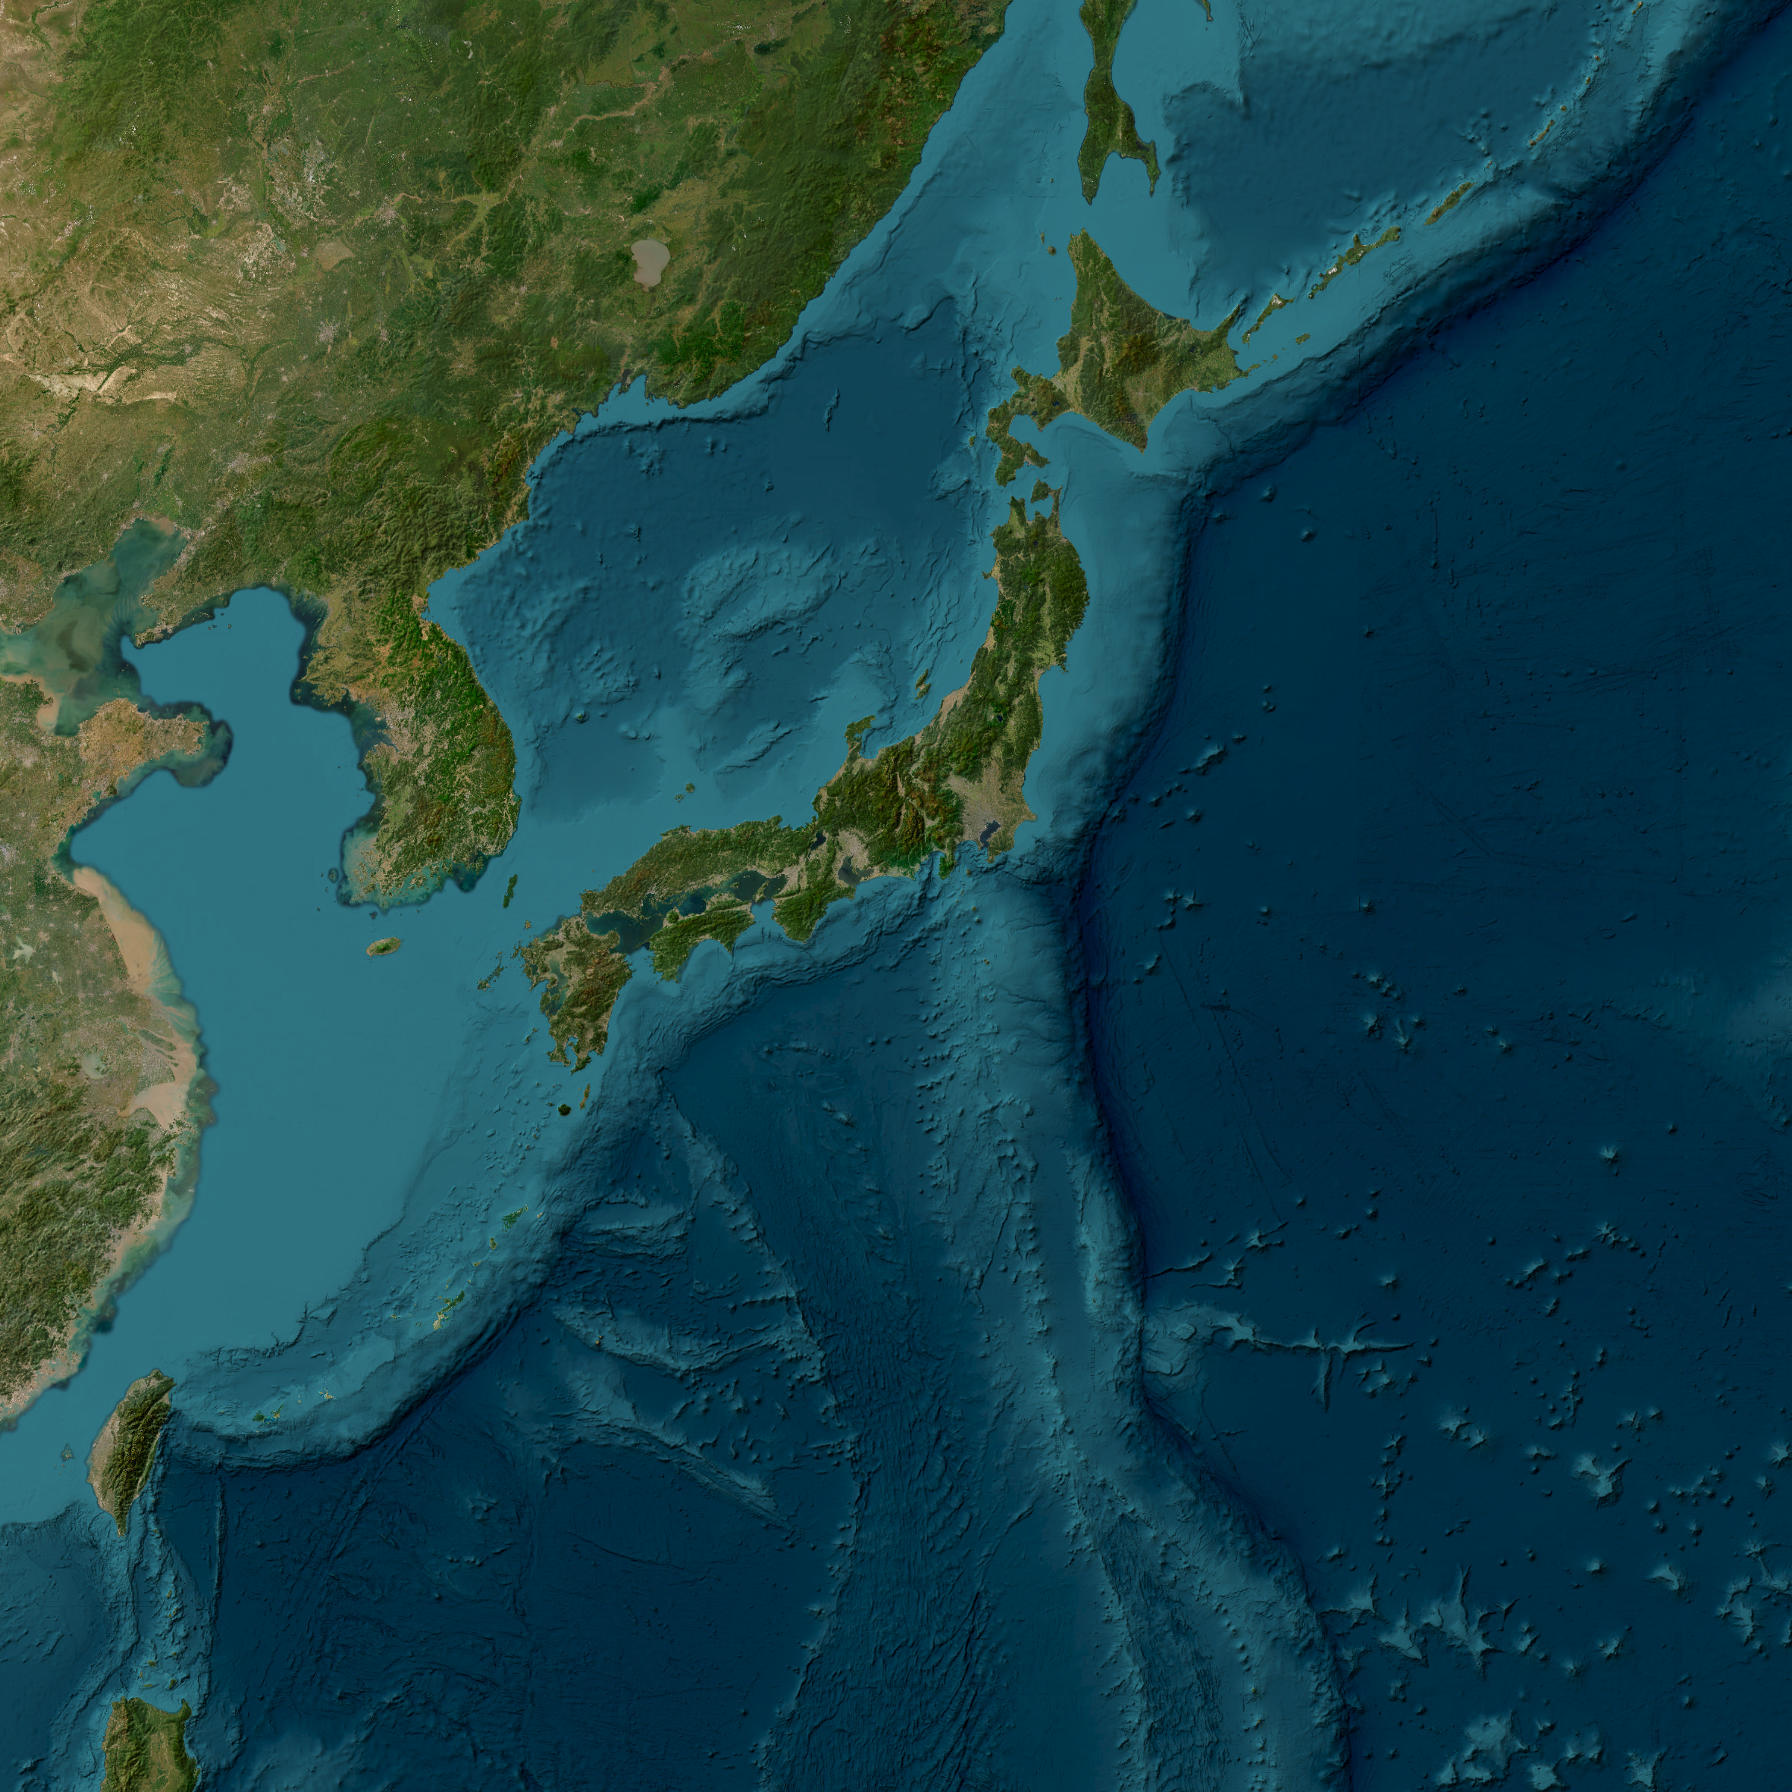

In [16]:
if ext_name == '.csv':
    df = pd.read_csv(saved_fname, encoding='ISO-8859-1')
    results = df
    # print(df)

if ext_name == 'gpkg':
    gdf = gpd.read_file(saved_fname)
    results = gdf
    gdf.plot()
    # print(gdf)

if ext_name == '.tif':
    results = Image.open(saved_fname)
    # Display the image
    # plt.imshow(results)
    # plt.colorbar()
    # plt.show()
    
results

In [17]:
results_df.drop(columns=['dt'])


NameError: name 'results_df' is not defined

In [ ]:
# results_df.sort_values('datetime')

In [ ]:
# results_df.groupby(['county'])['county'].count()
# results_df['']

# gdf.plot(facecolor="none", lw=1)

In [ ]:
# results_df['Estimate!!Total:'].sum()

In [ ]:
# results_df.rename(columns={"Estimate Median household income in the past 12 months (in 2021 inflation-adjusted dollars)":"income"})